In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
df = pd.read_csv("ifood_df.csv")

# Display basic information
print("Dataset Overview:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds     

In [4]:
# Remove duplicates
df = df.drop_duplicates()
print("\nDuplicate Rows Removed")



Duplicate Rows Removed


In [5]:
# Summary Statistics
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.575

In [6]:
# Select relevant features for clustering
features = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumStorePurchases"]
data = df[features]

In [7]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [8]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

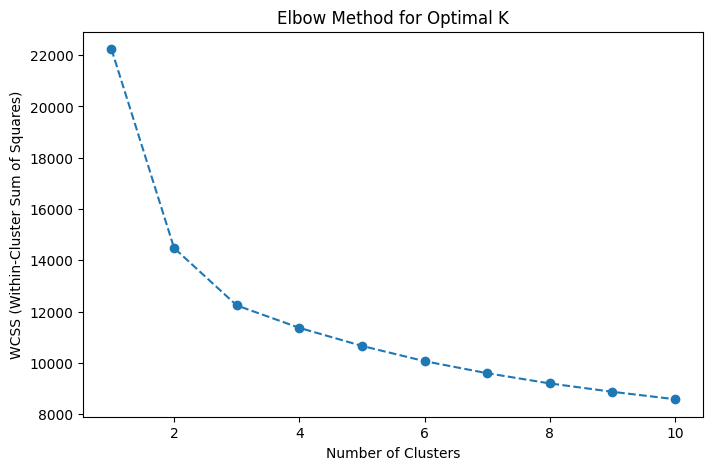

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [10]:
# Apply K-Means clustering with optimal K (assuming 4 clusters from Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

In [ ]:
# Visualization: Cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette="viridis")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Distribution of Customer Segments")
plt.show()

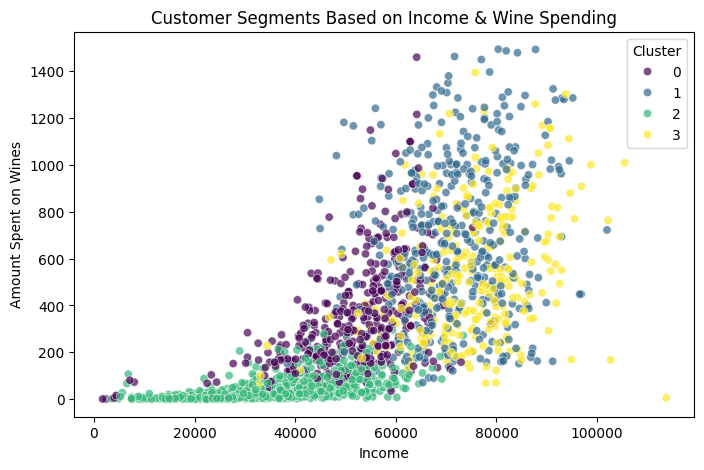

In [11]:
# Visualization: Income vs Spending (Wines) with Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Income'], y=df['MntWines'], hue=df['Cluster'], palette="viridis", alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Amount Spent on Wines")
plt.title("Customer Segments Based on Income & Wine Spending")
plt.show()


In [12]:
# Segment Analysis
print("\nSegment Characteristics:\n", df.groupby("Cluster").mean())


Segment Characteristics:
                Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        51428.340426  0.433511  0.875000  48.691489  349.468085  13.414894   
1        71442.731377  0.076749  0.451467  49.392777  665.160271  36.697517   
2        34485.735849  0.759156  0.462819  48.972253   39.563818   4.721421   
3        74425.634551  0.049834  0.279070  48.089701  523.946844  92.119601   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             102.095745        18.888298         14.154255     58.170213   
1             325.340858        52.582393         35.772009     57.237020   
2              21.134295         6.829079          5.031077     14.617092   
3             445.352159       131.056478         97.700997     94.245847   

         ...  marital_Together  mar

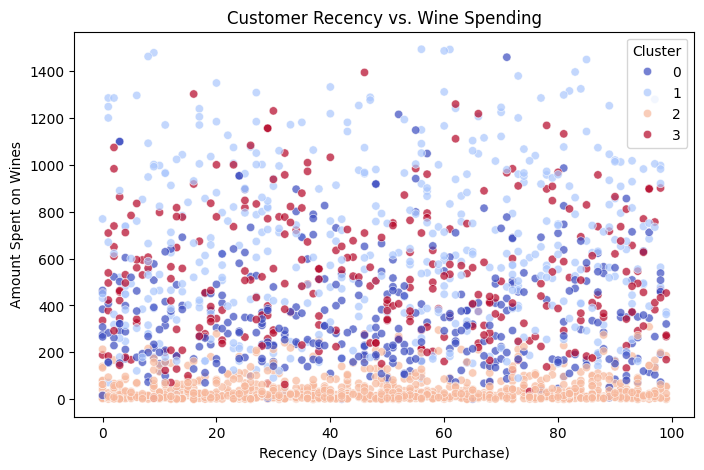

In [13]:
 #Recency vs. Spending (Customer Loyalty Analysis)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Recency"], y=df["MntWines"], hue=df["Cluster"], palette="coolwarm", alpha=0.7)
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Amount Spent on Wines")
plt.title("Customer Recency vs. Wine Spending")
plt.show()


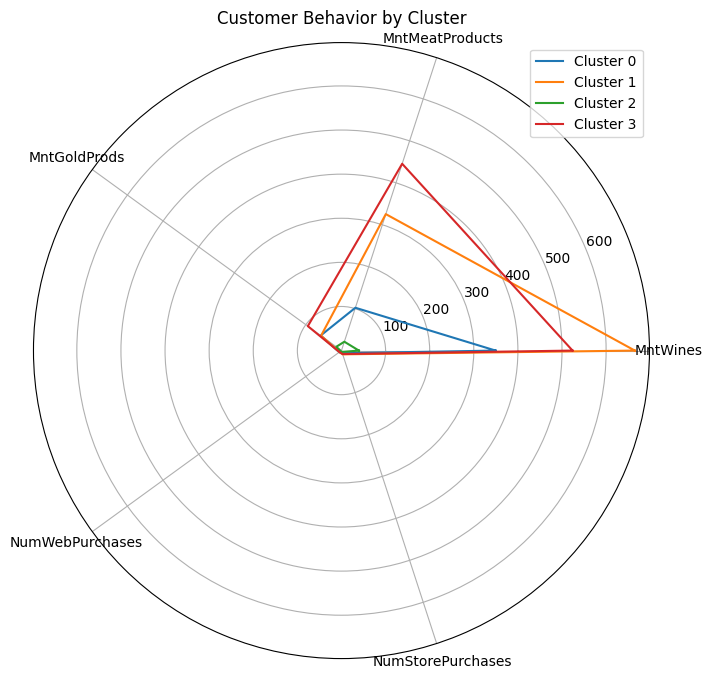

In [15]:
#Radar chart foe customer behaviour per cluster
from math import pi
# Prepare data
cluster_avg = df.groupby("Cluster")[["MntWines", "MntMeatProducts", "MntGoldProds", "NumWebPurchases", "NumStorePurchases"]].mean()
categories = cluster_avg.columns.tolist()
N = len(categories)

# Radar Chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i in range(len(cluster_avg)):
    values = cluster_avg.iloc[i].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')
    
plt.xticks(angles[:-1], categories)
plt.title("Customer Behavior by Cluster")
plt.legend()
plt.show()


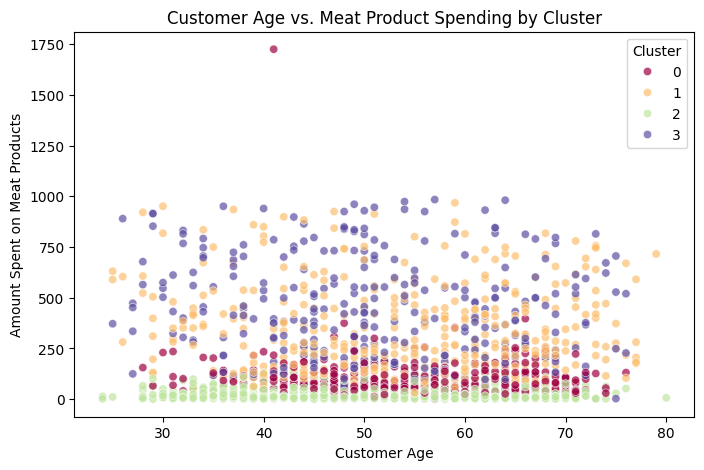

In [16]:
 #Customer Demographics (Age vs. Spending Patterns)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["MntMeatProducts"], hue=df["Cluster"], palette="Spectral", alpha=0.7)
plt.xlabel("Customer Age")
plt.ylabel("Amount Spent on Meat Products")
plt.title("Customer Age vs. Meat Product Spending by Cluster")
plt.show()


C:\Users\Samyam\AppData\Local\Temp\ipykernel_20404\2450821020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending_gold_fish = df.groupby("AgeGroup")[["MntGoldProds", "MntFishProducts"]].mean()


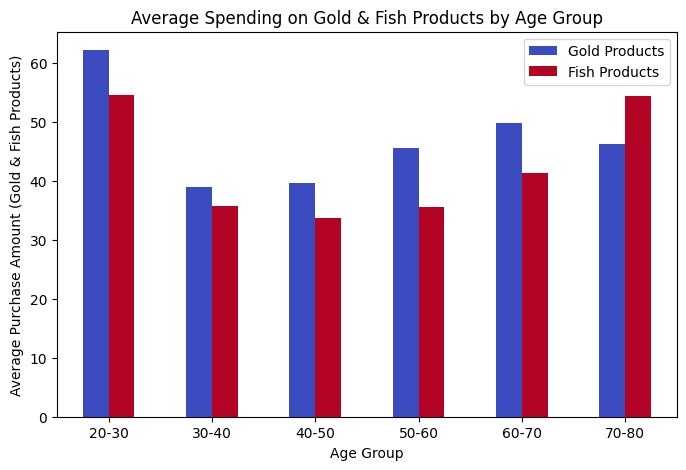

In [19]:
# Group by AgeGroup and calculate average spending on Gold & Fish products
# Create AgeGroup column by binning the 'Age' column
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

# Now group by AgeGroup
age_spending_gold_fish = df.groupby("AgeGroup")[["MntGoldProds", "MntFishProducts"]].mean()

# Plot bar chart
age_spending_gold_fish.plot(kind="bar", figsize=(8, 5), colormap="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount (Gold & Fish Products)")
plt.title("Average Spending on Gold & Fish Products by Age Group")
plt.legend(["Gold Products", "Fish Products"])
plt.xticks(rotation=0)
plt.show()

